In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tqdm
import cv2
import warnings
from tabulate import tabulate
# from tensorflow.keras.layers import Flatten
import torch

In [3]:
warnings.filterwarnings ('ignore')
pd.set_option ('display.width', None)
pd.set_option ('display.max_rows', 100)
pd.set_option ('display.max_columns', 50)

# 1. Data Loading

## Read a demo file

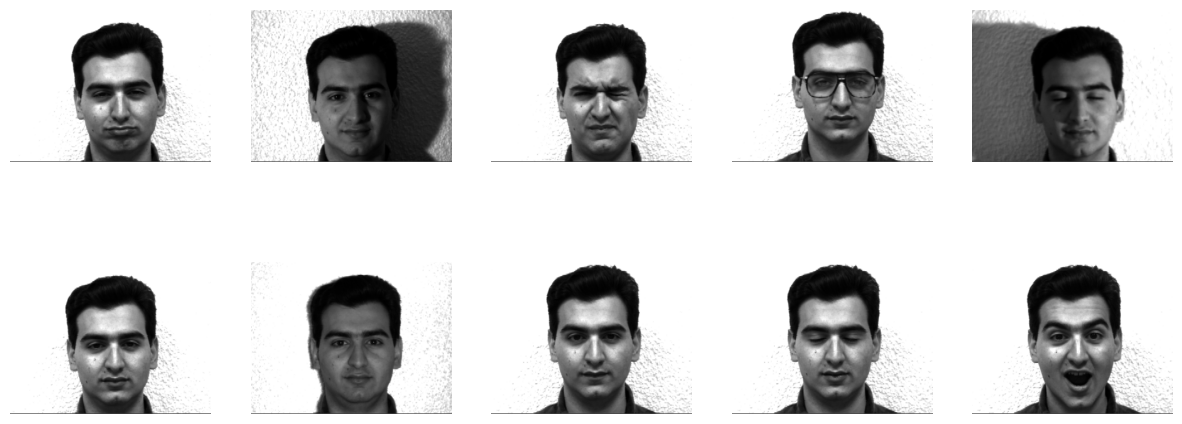

Đọc thành công.


In [5]:
from PIL import Image

# Mở ảnh
fig, ax = plt.subplots (2,5,figsize=(15,6))
# Đường dẫn đến thư mục chứa ảnh
folder_path = 'data/yalefaces/person-15'

# Lấy danh sách các file trong thư mục
files = os.listdir(folder_path)
# enumerate trả về index và element
for i, file in enumerate(files):
    # Đọc ảnh
    file_path = os.path.join(folder_path, file)
    img = Image.open(file_path)

    # Chuyển sang grayscale (nếu cần)
    img = img.convert('L')

    # Lấy vị trí row, column trong lưới
    row = i // 5
    col = i % 5

    # Hiển thị ảnh
    ax[row, col].imshow(img, cmap='gray')
    ax[row, col].axis('off')  # Tắt các trục

plt.show()

img_array = np.array(img)

flattened = img_array.flatten ()
# Kiểm tra xem đọc được chưa
if img is not None:
    print(f"Đọc thành công.")
else:
    print("Không đọc được ảnh")

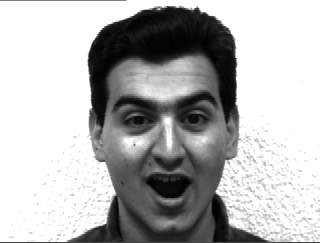

In [6]:
img

In [7]:
img_array

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 235, 238, 255],
       [255, 255, 255, ..., 234, 243, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], shape=(243, 320), dtype=uint8)

In [8]:
flattened

array([130, 130, 130, ...,  68,  68,  68], shape=(77760,), dtype=uint8)

## Read all files 
(Except "test" folder)

In [ ]:
root_folder = "data/yalefaces"  # hoặc đường dẫn đầy đủ
image_vectors = []
labels = []
for person_folder in os.listdir (root_folder):
    if person_folder == "text": 
        continue
    person_path = os.path.join (root_folder, person_folder)
    
    if os.path.isdir (person_path):
        for filename in os.listdir (person_path):
            file_path = os.path.join (person_path, filename)
            try:
                img = Image.open (file_path).convert ("L") #grayscale
                img_array = np.array (img).flatten ()
                image_vectors.append (img_array)
                labels.append (person_folder + "_" + filename)
            except Exception as e:
                print (f"Không đọc được: {file_path} -- {e}")
X = np.array (image_vectors)
X

array([[130, 130, 130, ...,  68,  68,  68],
       [130, 130, 130, ...,  68,  68,  68],
       [130, 130, 130, ...,  68,  68,  68],
       ...,
       [109, 111, 124, ...,  68,  68,  68],
       [108, 110, 123, ...,  68,  68,  68],
       [109, 112, 124, ...,  68,  68,  68]],
      shape=(165, 77760), dtype=uint8)

In [10]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler ()
X_standardized = scaler.fit_transform (X)

from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler ()
X_normalized = scaler.fit_transform (X)
X_standardized.shape 
data = [
    ["Standardized", X_standardized[:10,:5].tolist ()],
    ["Normalized", X_normalized[:10,:5].tolist ()]
]
print("\n📋 TABLE INFORMATION")
print(tabulate(data, headers=["Method", "Sample Data"],tablefmt="fancy_grid"))


📋 TABLE INFORMATION
╒══════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

# 2. Assignments

## Assignment 1 (4 scores)

- Implement PCA using Numpy.

### Solution 1

- Use eigenvalues và eigenvectors (Do not use this function)

In [9]:
class PCA_Eigen:
    # Bước 1: Chuẩn hoá dữ liệu
    # Bước 2: Tính Covariance Matrix
    # Bước 3:  Tìm eigenvalue và eigenvector
    # Bước 4: Sắp xếp eigenvectors theo eigenvalues giảm dần 
    # Bước 5: Xác định principle components
    def __init__ (self, n_components=None):
        '''PCA sử dụng Eigenvalues và Eigenvectors'''
        self.n_components = n_components # Số lượng thành phần chính
        self.components_ = None # Ma trận thành phần chính (eigenvectors)
        self.explained_variance_ = None # Phương sai mỗi thành phần
        self.explained_variance_ratio_ = None # Tỷ lệ phương sai
        self.mean_ = None # Trung bình của dữ liệu
    
    def fit (self, X: np.ndarray):
        '''fit PCA bằng cách sử dụng Eigenvalues và Eigenvectors'''
        # 1. Chuẩn hoá: Standardized, Normalized hoặc trừ trung bình
        # 2. Ma trận hiệp phương sai
        cov_matrix = np.cov (X, rowvar=False) # S = X.T @ X / (n_samples - 1)
        
        # 3. Eigenvalues & Eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh (cov_matrix)
        
        # 4. Sắp xếp theo giá trị riêng giảm dần
        sorted_idx = np.argsort (eigenvalues) [::-1]
        eigenvalues = eigenvalues [sorted_idx]
        eigenvectors = eigenvectors [:, sorted_idx]
        
        # 5. Lưu các thành phần chính
        if self.n_components is None:
            self.n_components = X.shape [1]
        self.components_ = eigenvectors [:, :self.n_components]
        
        # 6. Tỉ lệ phương sai giải thích
        total_variance = np.sum (eigenvalues)
        self.explained_variance_ratio_ = eigenvalues [:self.n_components] / total_variance
        
        return self     

    def transform (self, X: np.ndarray):
        ''''''
        X_transformed = X @ self.components_
        return X_transformed
    
    def fit_transform (self, X:np.ndarray):
        ''''''
        self.fit (X)
        return self.transform (X)
    
    def inverse_transform (self, X: np.ndarray):
        ''''''
        return None


### Solution 2

- Use SVD 

In [10]:
class PCA_SVD:
    def __init__ (self, n_components=None):
        '''PCA sử dụng SVD'''
        self.n_components = n_components
        self.components_ = None
        self.explained_variance_ = None
        self.explained_variance_ratio_ = None
        self.mean_ = None

    
    def fit (self, X:np.ndarray):
        '''fit PCA bằng SVD'''
        # 1. Chuẩn hoá: Standardized, Normalized hoặc trừ trung bình
        # self.mean_ = np.mean(X, axis=0)
        # X_centered = X - self.mean_
        # 2. SVD
        U, S, Vt = np.linalg.svd (X, full_matrices=False)
        
        # 3. Các thành phần chính là các hàng đầu của Vt
        if self.n_components is None:
            self.n_components = X.shape [1]
        
        self.components_ = Vt [:self.n_components, :]
        
        # 4. Tỉ lệ phương sai giải thích
        singular_values_squared = S**2
        total_variance = np.sum (singular_values_squared)
        self.explained_variance_ = singular_values_squared[:self.n_components] / (X.shape[0] - 1)
        self.explained_variance_ratio_ = singular_values_squared[:self.n_components] / total_variance

        return self
    
    def transform (self, X: np.ndarray):
        ''''''
        X_transformed = X @ self.components_.T
        return X_transformed
    
    def fit_transform (self, X: np.ndarray):
        ''''''
        self.fit (X)
        return self.transform (X)
    
    def inverse_transform (self, X_transformed: np.ndarray) -> np.ndarray:
        ''''''
        X_approx = np.dot (X_transformed, self.components_)
        return X_approx

## Assignment 2 (4 scores)

- Reading the training images.
- Approximating the Principle Space having **20 dimensions**.
- Visualize the base of this Principle Space.

Shape của X_pca sau khi giảm chiều: (165, 20)
Các thành phần chính (components):
[[-0.00394795 -0.00481027 -0.00507975 ...  0.          0.
   0.        ]
 [-0.00415511 -0.00406314 -0.00399859 ...  0.          0.
   0.        ]
 [ 0.00428252  0.0028182   0.0018026  ...  0.          0.
   0.        ]
 ...
 [ 0.00099152 -0.00060301 -0.00155845 ...  0.          0.
   0.        ]
 [ 0.00385817  0.00272619  0.00240523 ...  0.          0.
   0.        ]
 [-0.00145205 -0.00048105  0.00053621 ...  0.          0.
   0.        ]]
Tỉ lệ phương sai giải thích của các thành phần chính: [0.27359715 0.16935481 0.09148956 0.06853745 0.03751918 0.03249995
 0.02847324 0.02377062 0.02103381 0.01670024 0.01415375 0.0121013
 0.01080266 0.00967325 0.00906276 0.00815881 0.0078539  0.00708793
 0.00683592 0.00674867]


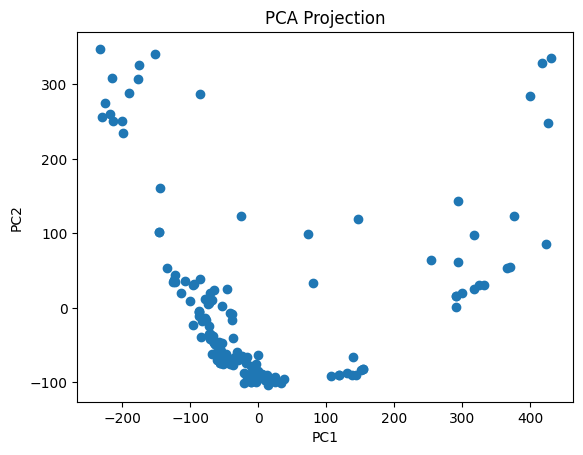

In [12]:
# Bước 1: Khởi tạo PCA, có thể chỉ định số thành phần muốn giữ lại
n_components = 20
pca = PCA_SVD (n_components=n_components)

# Bước 2: Áp dụng PCA
X_pca = pca.fit_transform (X_standardized)

# Bước 3: Xem kết quả
print(f"Shape của X_pca sau khi giảm chiều: {X_pca.shape}")
print("Các thành phần chính (components):")
print(pca.components_)

# Kiểm tra tỉ lệ phương sai được giải thích (explained variance)
print(f"Tỉ lệ phương sai giải thích của các thành phần chính: {pca.explained_variance_ratio_}")

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

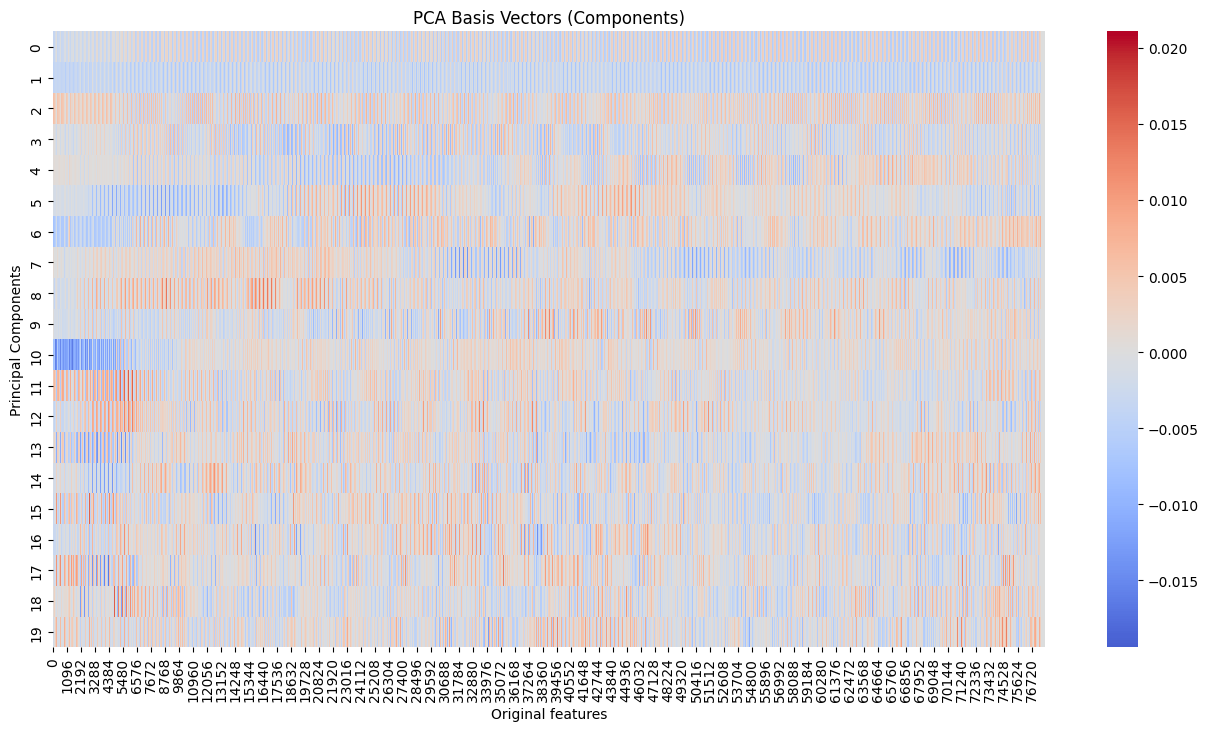

In [13]:
plt.figure(figsize=(16, 8))
sns.heatmap(pca.components_, cmap='coolwarm', center=0)
plt.xlabel("Original features")
plt.ylabel("Principal Components")
plt.title("PCA Basis Vectors (Components)")
plt.show()

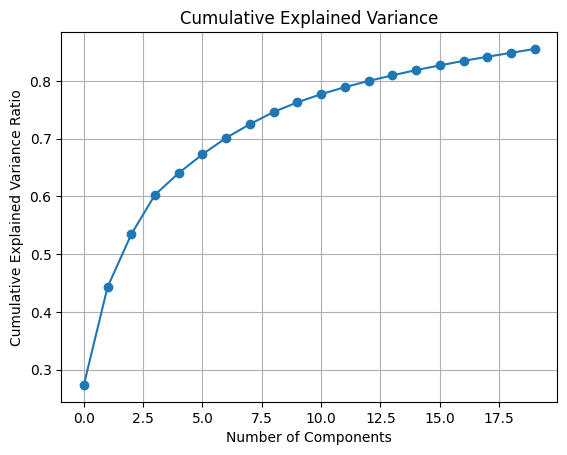

array([0.27359715, 0.16935481, 0.09148956, 0.06853745, 0.03751918,
       0.03249995, 0.02847324, 0.02377062, 0.02103381, 0.01670024,
       0.01415375, 0.0121013 , 0.01080266, 0.00967325, 0.00906276,
       0.00815881, 0.0078539 , 0.00708793, 0.00683592, 0.00674867])

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.grid(True)
plt.show()
pca.explained_variance_ratio_

## Assignment 3 (2 scores)
 
- Assign persons to the face images in testing data.
- Evaluate the accuracy of this face recognition system.

### Read all files in test folder

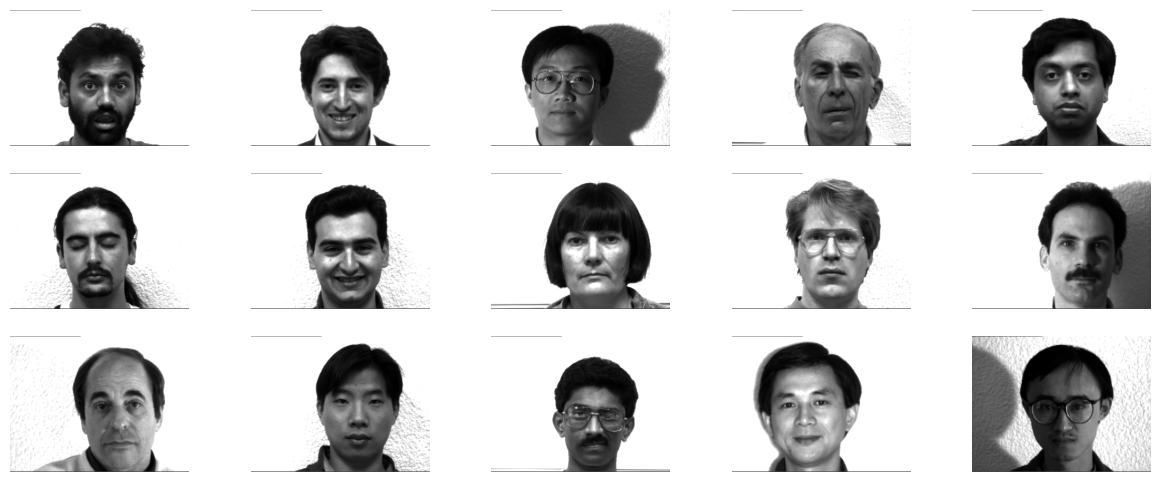

Đọc thành công.


In [20]:
# Mở ảnh
fig, ax = plt.subplots (3,5,figsize=(15,6))
# Đường dẫn đến thư mục chứa ảnh
folder_path = 'yalefaces/test'

# Lấy danh sách các file trong thư mục
files = os.listdir(folder_path)
# enumerate trả về index và element
for i, file in enumerate(files):
    # Đọc ảnh
    file_path = os.path.join(folder_path, file)
    img = Image.open(file_path)

    # Chuyển sang grayscale (nếu cần)
    img = img.convert('L')

    # Lấy vị trí row, column trong lưới
    row = i // 5
    col = i % 5

    # Hiển thị ảnh
    ax[row, col].imshow(img, cmap='gray')
    ax[row, col].axis('off')  # Tắt các trục

plt.show()

img_array = np.array(img)

flattened = img_array.flatten ()
# Kiểm tra xem đọc được chưa
if img is not None:
    print(f"Đọc thành công.")
else:
    print("Không đọc được ảnh")

In [ ]:
root_folder = "yalefaces"  # hoặc đường dẫn đầy đủ
image_vectors = []
labels = []
for person_folder in os.listdir (root_folder):
    if "person" in person_folder: 
        continue
    person_path = os.path.join (root_folder, person_folder)
    
    if os.path.isdir (person_path):
        for filename in os.listdir (person_path):
            file_path = os.path.join (person_path, filename)
            try:
                img = Image.open (file_path).convert ("L") #grayscale
                img_array = np.array (img).flatten ()
                image_vectors.append (img_array)
                labels.append (person_folder + "_" + filename)
            except Exception as e:
                print (f"Không đọc được: {file_path} -- {e}")
X_test = np.array (image_vectors)
X_test

array([[130, 130, 130, ...,  68,  68,  68],
       [130, 130, 130, ...,  68,  68,  68],
       [130, 130, 130, ...,  68,  68,  68],
       ...,
       [130, 130, 130, ...,  68,  68,  68],
       [130, 130, 130, ...,  68,  68,  68],
       [ 85,  86,  87, ...,  68,  68,  68]], dtype=uint8)

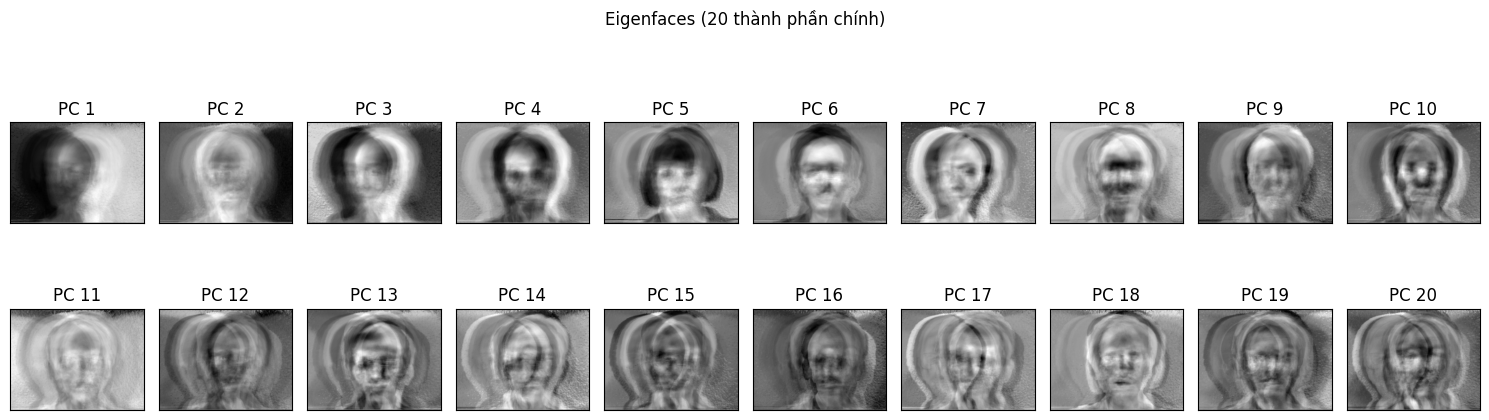

In [24]:
image_shape = (243, 320)  # hoặc (320, 243) nếu hình bị xoay

fig, axes = plt.subplots(2, 10, figsize=(15, 5), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    eigenface = pca.components_[i].reshape(image_shape)
    ax.imshow(eigenface, cmap='gray')
    ax.set_title(f"PC {i+1}")
plt.suptitle("Eigenfaces (20 thành phần chính)")
plt.tight_layout()
plt.show()

In [23]:
X.shape

(165, 77760)

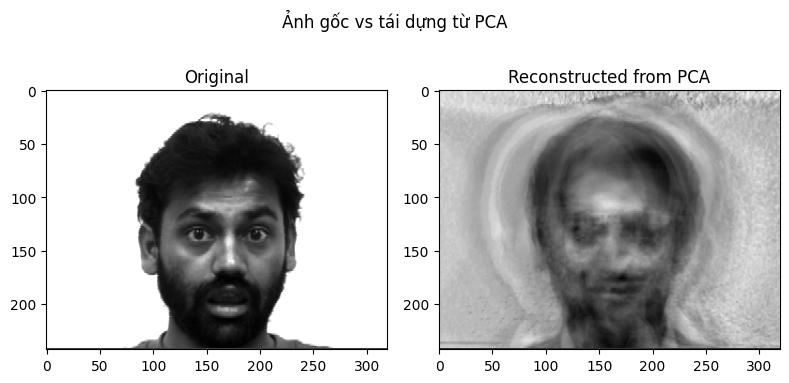

In [26]:
# Chọn một ảnh từ X_test
sample = X_test[0]  # ảnh đầu tiên
X_projected = pca.transform([sample])
X_reconstructed = pca.inverse_transform(X_projected)

# So sánh ảnh gốc và ảnh khôi phục
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(sample.reshape(image_shape), cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(X_reconstructed.reshape(image_shape), cmap='gray')
ax[1].set_title("Reconstructed from PCA")
plt.suptitle("Ảnh gốc vs tái dựng từ PCA")
plt.tight_layout()
plt.show()


### Evaluation

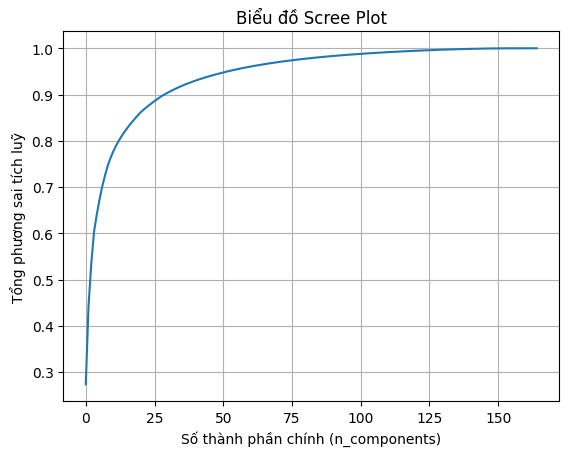

array([2.73597152e-01, 1.69354813e-01, 9.14895586e-02, 6.85374476e-02,
       3.75191754e-02, 3.24999480e-02, 2.84732352e-02, 2.37706188e-02,
       2.10338067e-02, 1.67002397e-02, 1.41537546e-02, 1.21012971e-02,
       1.08026597e-02, 9.67324843e-03, 9.06276153e-03, 8.15880705e-03,
       7.85390484e-03, 7.08792841e-03, 6.83592437e-03, 6.74866528e-03,
       6.23136763e-03, 5.48404983e-03, 4.95762937e-03, 4.75165782e-03,
       4.61629784e-03, 4.38167693e-03, 4.24923232e-03, 4.04511987e-03,
       3.96928895e-03, 3.39325105e-03, 3.13934883e-03, 3.06470842e-03,
       2.96872292e-03, 2.88598867e-03, 2.70573821e-03, 2.63279916e-03,
       2.56017066e-03, 2.31902657e-03, 2.22992597e-03, 2.16853980e-03,
       2.10763794e-03, 2.00499907e-03, 1.92618046e-03, 1.89327307e-03,
       1.86644608e-03, 1.73325685e-03, 1.69947456e-03, 1.62389198e-03,
       1.59805972e-03, 1.58218871e-03, 1.50018529e-03, 1.46787912e-03,
       1.43685510e-03, 1.39551086e-03, 1.36948525e-03, 1.27474543e-03,
      

In [28]:
from sklearn.decomposition import PCA
pca = PCA().fit (X_standardized)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum (explained_variance)

plt.plot (cumulative_variance)
plt.xlabel ("Số thành phần chính (n_components)")
plt.ylabel ("Tổng phương sai tích luỹ")
plt.title ("Biểu đồ Scree Plot")

plt.grid (True)
plt.show ()
pca.explained_variance_ratio_